# クラスタリング入門
- 教師なし学習
- データをグルーピングする方法
- K-means法

In [1]:
%matplotlib inline
from __future__ import print_function

try:
    xrange
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [3]:
# ダミーデータ作成
def generate_2dim_normal(mean, variance, convariance, sample_size):
    cov = [[variance, convariance], [convariance, variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

cluster1 = generate_2dim_normal(mean=[0, 8], variance=1, convariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean=[-1, 0], variance=1, convariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean=[10, 10], variance=1, convariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean=[5, 5.5], variance=0.8, convariance=-0.1, sample_size=200)

data = np.vstack((cluster1, cluster2, cluster3, cluster4))

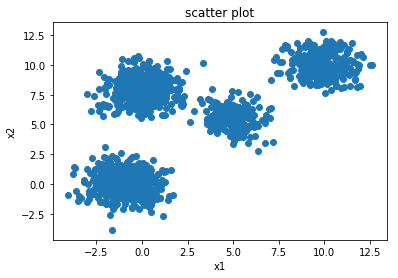

In [4]:
# 可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:, 0], data[:, 1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [12]:
# K-means法
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
km.fit(data)
cluster_labels = km.predict(data)


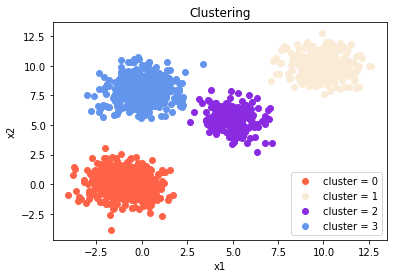

In [13]:
# グラフの描画の初期化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
            'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']

# クラスターの番号をユニークにします
cluster_ids = list(set(cluster_labels))

# クラスターごとに色を変えながら、散布図に出力
for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'cluster = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1], c=colorlist[k], label=label_)
ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

## 最適なクラスター数を探そう
### Elbow method

In [14]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k,  init='k-means++', n_init=10, max_iter=300)
    km.fit(data)
    intra_sum_of_square_list.append(km.inertia_)

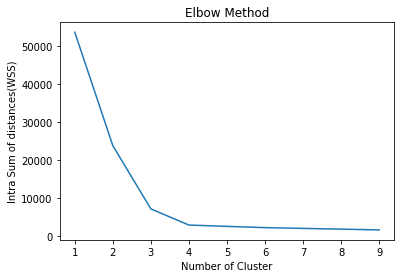

In [15]:
# 可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Cluster')
ax.set_ylabel('Intra Sum of distances(WSS)')
plt.plot(clusters_, intra_sum_of_square_list)

### シルエットプロット

In [28]:
# K-meanクラスタリングの実行
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(data)
cluster_labels = km.predict(data)

# シルエットスコアの平均を計算
silhouette_avg = silhouette_score(data, cluster_labels)

# それぞれのデータ点のシルエットスコアを計算する
each_silhouette_score = silhouette_samples(data, cluster_labels, metric='euclidean')

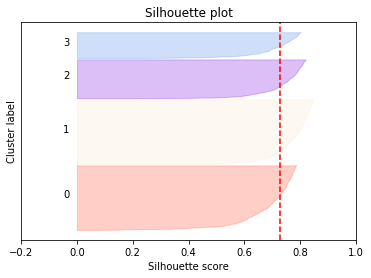

In [29]:
# 可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

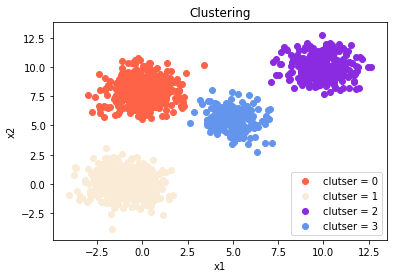

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

## 演習 p119

In [35]:
wholsesale_data = pd.read_csv('dataset/Wholesale_customers_data.csv')

In [36]:
wholsesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [37]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [38]:
dataset_for_cl = wholsesale_data[cols]
dataset_for_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [39]:
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

In [48]:
# Elbow method
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(dataset_for_cl)
    intra_sum_of_square_list.append(km.inertia_)

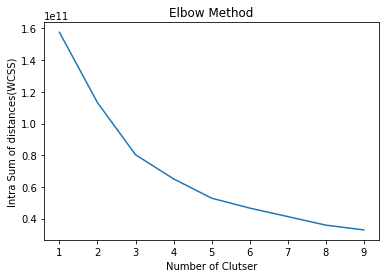

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

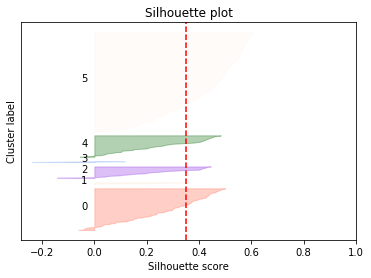

In [50]:
# シルエットプロット
n_clusters = 6
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(dataset_for_cl_scaled)
cluster_labels = km.predict(dataset_for_cl_scaled)

silhouette_avg = silhouette_score(dataset_for_cl_scaled, cluster_labels)

each_silhouette_score = silhouette_samples(dataset_for_cl_scaled,
                                           cluster_labels, metric='euclidean')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

y_lower = 10

for i in range(n_clusters):
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.211083,0.050321,0.054051,0.058145,0.027098,0.036034
1,0.057678,0.042896,0.042500,0.040237,0.026432,0.020085
2,0.142352,0.472237,0.523140,0.050183,0.609283,0.061381
3,0.046206,0.152589,0.188195,0.023986,0.187648,0.036274
4,0.445660,0.106659,0.082084,0.253760,0.026902,0.070676
5,0.328548,0.597975,0.217396,0.600207,0.005854,1.000000


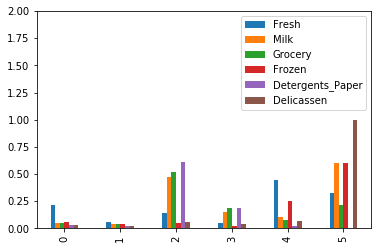

In [43]:
km_centers = pd.DataFrame(km.cluster_centers_, columns=cols)
km_centers.plot.bar(ylim=[0, 2], fontsize=10)
km_centers